### Regression models to predict US open price:

c:\Users\johan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Linear Regression - Mean Squared Error: 0.0001, R^2 Score: 0.9673
Decision Tree Regressor - Mean Squared Error: 0.0002, R^2 Score: 0.8703
Random Forest Regressor - Mean Squared Error: 0.0001, R^2 Score: 0.9629
Gradient Boosting Regressor - Mean Squared Error: 0.0001, R^2 Score: 0.9592


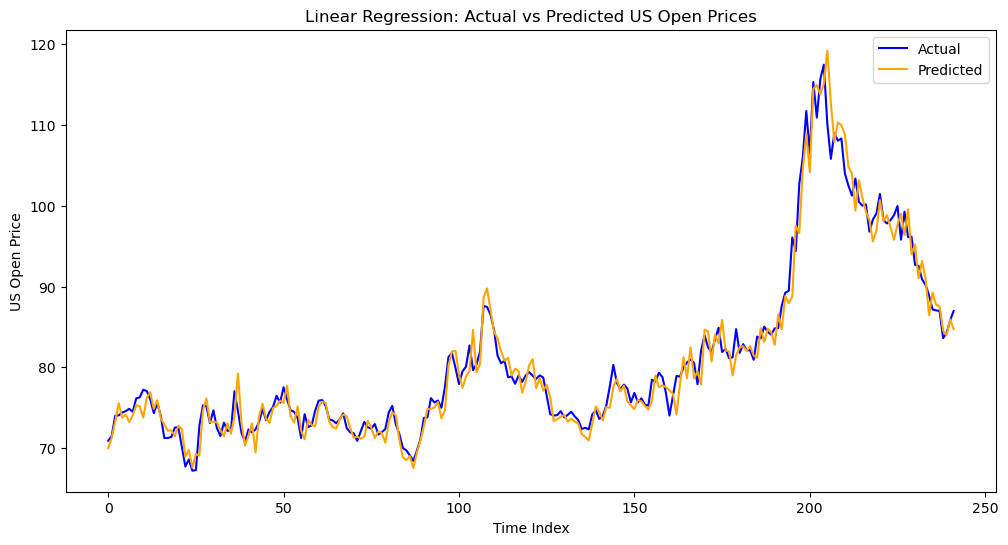

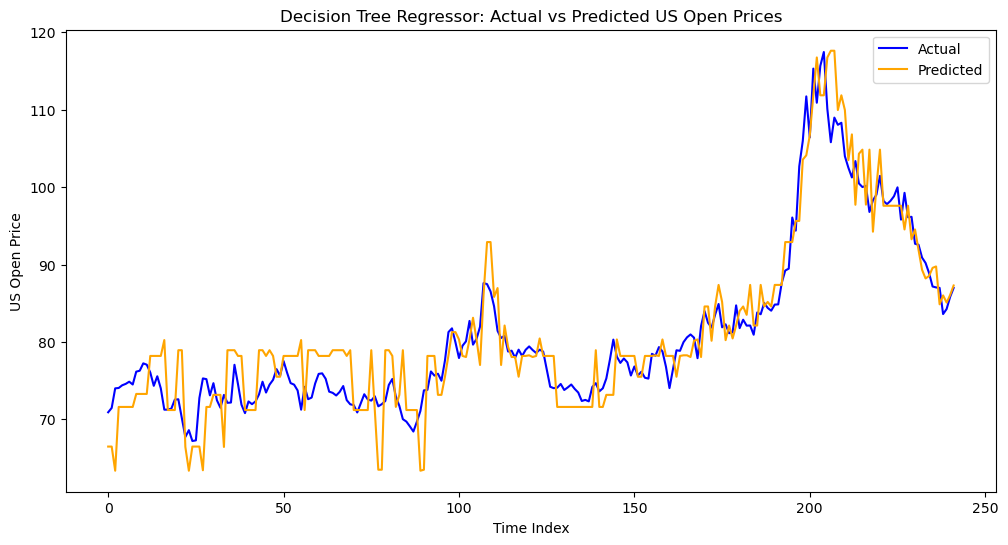

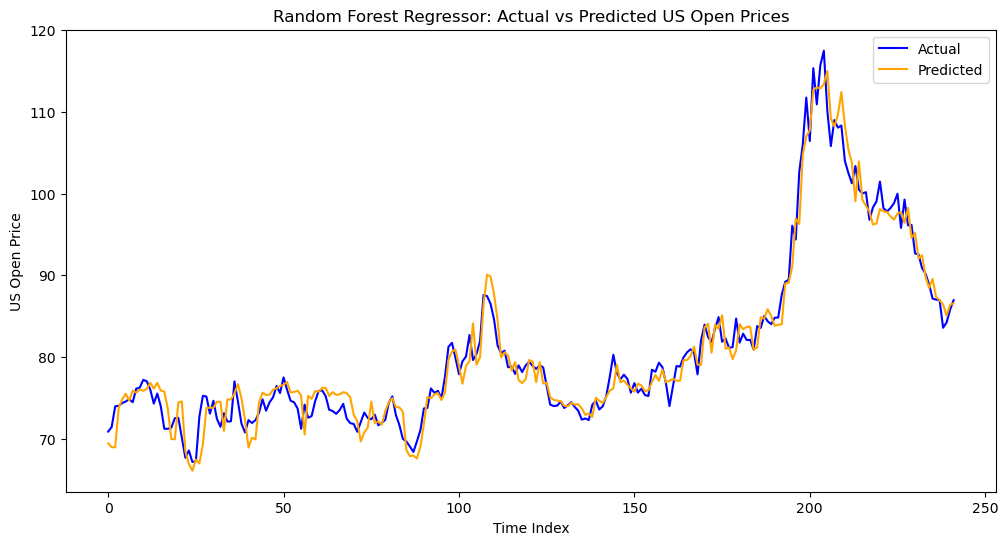

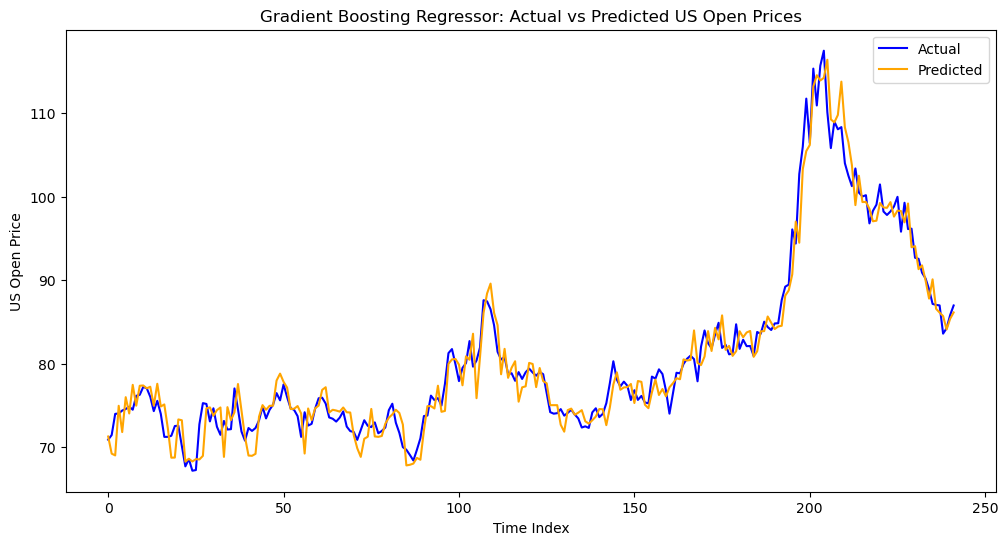

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('stock_data.csv')

# Features and target
X = df[['HK_Close', 'US_Close', 'VIX', 'Treasury_Yield', 'RSI_US', 'US_HK_Ratio', 'US_Volume', 'HK_Volume', 'US_MA20', 'HK_MA20']]
y = df['US_Open']

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale the whole dataset (fitting on training only)
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Sequential train-test split: first 80% for training, rest for testing
train_size = int(0.8 * len(X))
X_train_scaled = X_scaled[:train_size]
X_test_scaled = X_scaled[train_size:]
y_train_scaled = y_scaled[:train_size]
y_test_scaled = y_scaled[train_size:]

# Create sequences for regression models (not typically done, but to match the LSTM approach)
def create_sequences(data, target, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps].flatten())  # Flatten the sequence for regression models
        y.append(target[i+timesteps])
    return np.array(X), np.array(y)

# Number of historical timesteps to consider
timesteps = 10

# Create sequences for train and test sets
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, timesteps)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")
    return y_pred

# Linear Regression
linear_model = LinearRegression()
y_pred_lr = evaluate_model(linear_model, X_train_seq, X_test_seq, y_train_seq, y_test_seq, "Linear Regression")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=45)
y_pred_dt = evaluate_model(dt_model, X_train_seq, X_test_seq, y_train_seq, y_test_seq, "Decision Tree Regressor")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=45)
y_pred_rf = evaluate_model(rf_model, X_train_seq, X_test_seq, y_train_seq, y_test_seq, "Random Forest Regressor")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=45)
y_pred_gb = evaluate_model(gb_model, X_train_seq, X_test_seq, y_train_seq, y_test_seq, "Gradient Boosting Regressor")

# Inverse transform predictions and actual values to original scale
y_test_rescaled = scaler_y.inverse_transform(y_test_seq)
y_pred_lr_rescaled = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))
y_pred_dt_rescaled = scaler_y.inverse_transform(y_pred_dt.reshape(-1, 1))
y_pred_rf_rescaled = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
y_pred_gb_rescaled = scaler_y.inverse_transform(y_pred_gb.reshape(-1, 1))

# Plot actual vs predicted values for each model
models_predictions = {
    "Linear Regression": y_pred_lr_rescaled,
    "Decision Tree Regressor": y_pred_dt_rescaled,
    "Random Forest Regressor": y_pred_rf_rescaled,
    "Gradient Boosting Regressor": y_pred_gb_rescaled
}

for model_name, y_pred in models_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.xlabel('Time Index')
    plt.ylabel('US Open Price')
    plt.title(f"{model_name}: Actual vs Predicted US Open Prices")
    plt.legend()
    plt.show()


### Trading performance for different regression models (using our trading simulator class):

Linear Regression - Mean Squared Error: 0.7095, R^2 Score: 0.9936
Decision Tree Regressor - Mean Squared Error: 2.2060, R^2 Score: 0.9800
Random Forest Regressor - Mean Squared Error: 1.1379, R^2 Score: 0.9897
Gradient Boosting Regressor - Mean Squared Error: 1.1836, R^2 Score: 0.9893

=== Linear Regression Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 107908.08
Portfolio Growth: 7.91%
Total Buys: 37, Total Sells: 37
-----------------------------------



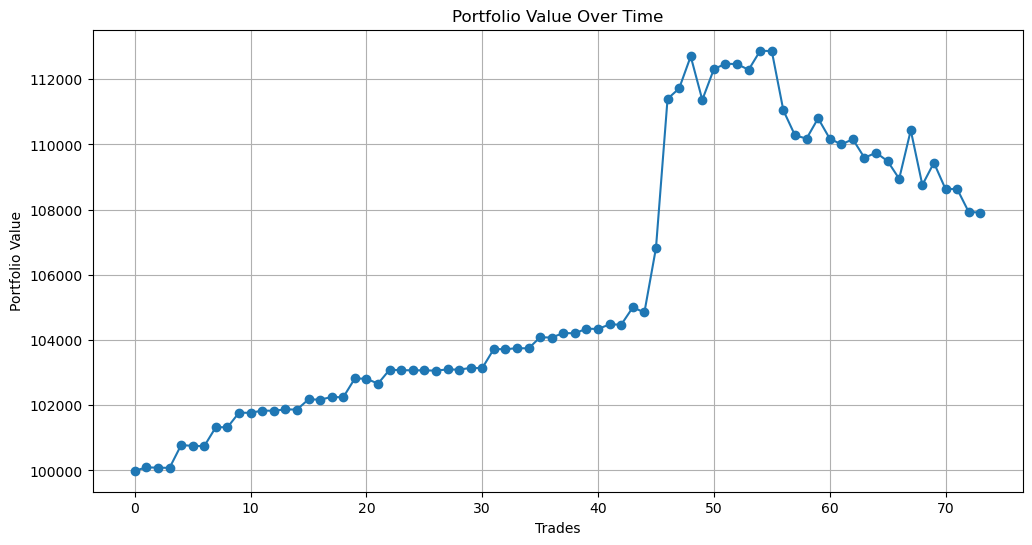

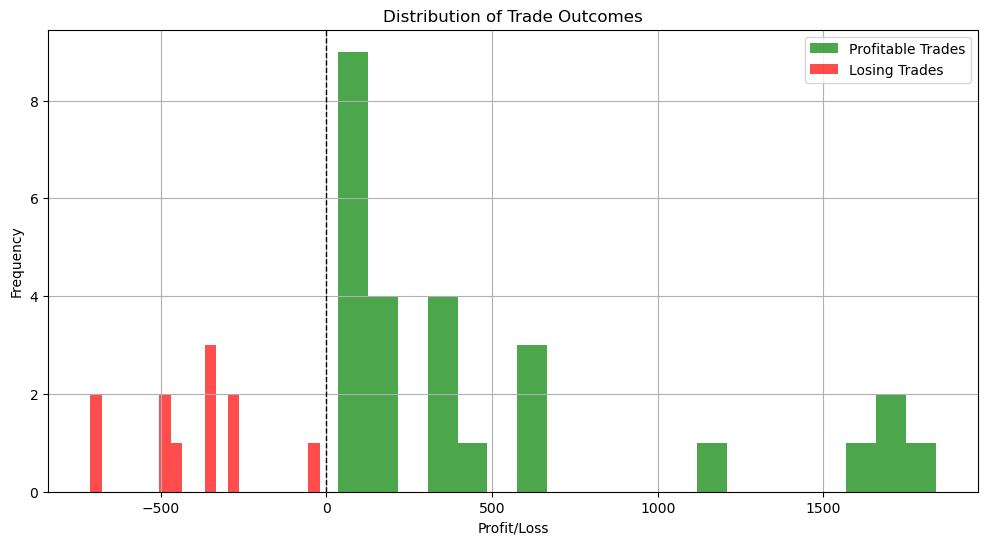


=== Performance Metrics ===
Total Profit: 8229.41
Total Trades: 37
Win Rate: 70.27%
----------------------------

BUY FAILED: Not enough cash (Available: 7184.42, Needed: 7735.93)
BUY FAILED: Not enough cash (Available: 6854.35, Needed: 7854.00)
BUY FAILED: Not enough cash (Available: 6854.35, Needed: 7859.13)

=== Decision Tree Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 110071.88
Portfolio Growth: 10.07%
Total Buys: 86, Total Sells: 83
-----------------------------------



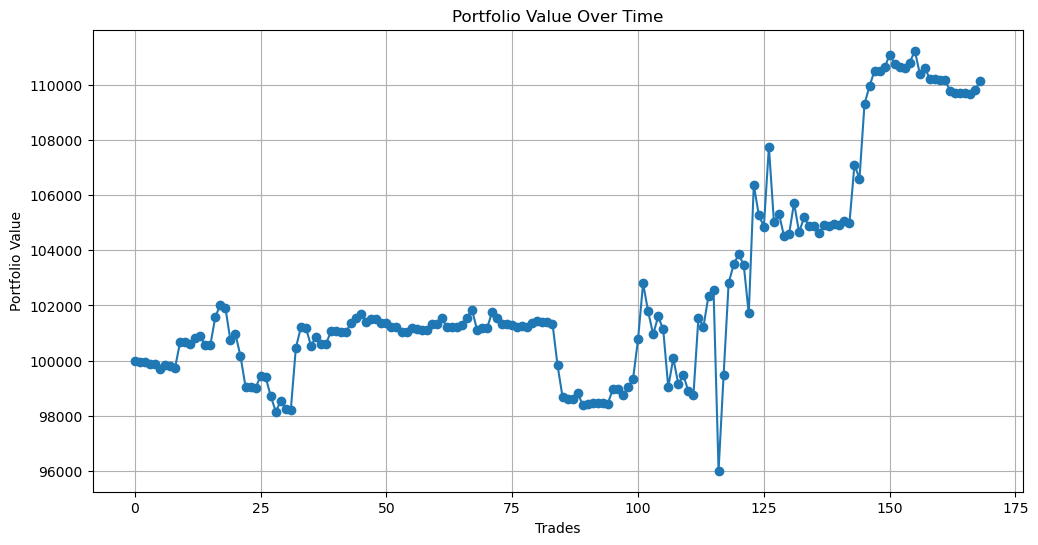

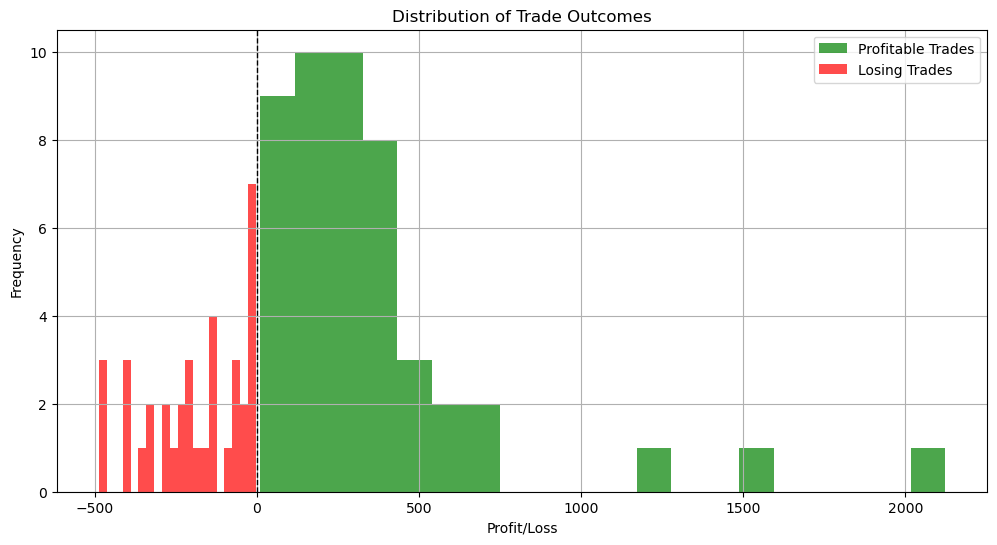


=== Performance Metrics ===
Total Profit: 10331.07
Total Trades: 83
Win Rate: 56.63%
----------------------------


=== Random Forest Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 99557.69
Portfolio Growth: -0.44%
Total Buys: 68, Total Sells: 68
-----------------------------------



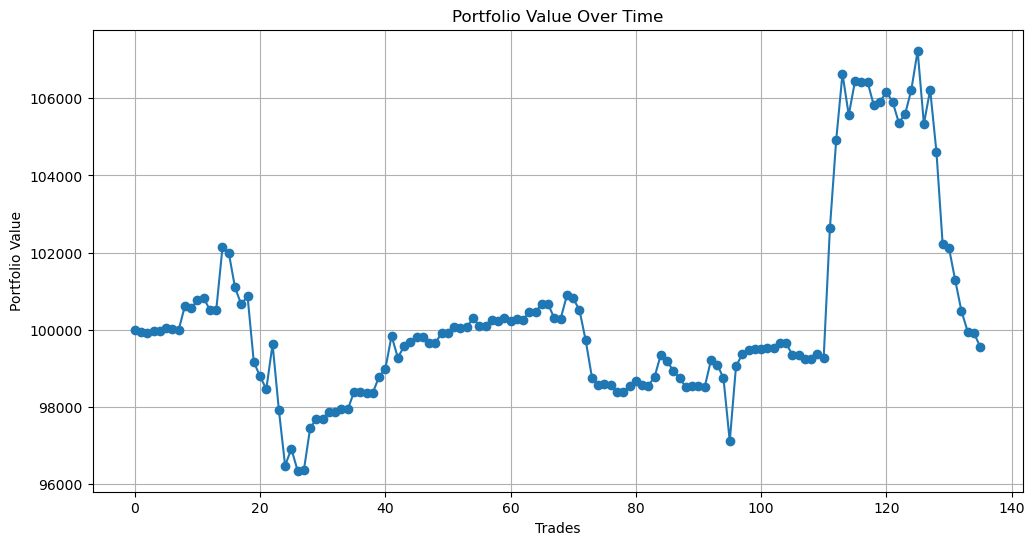

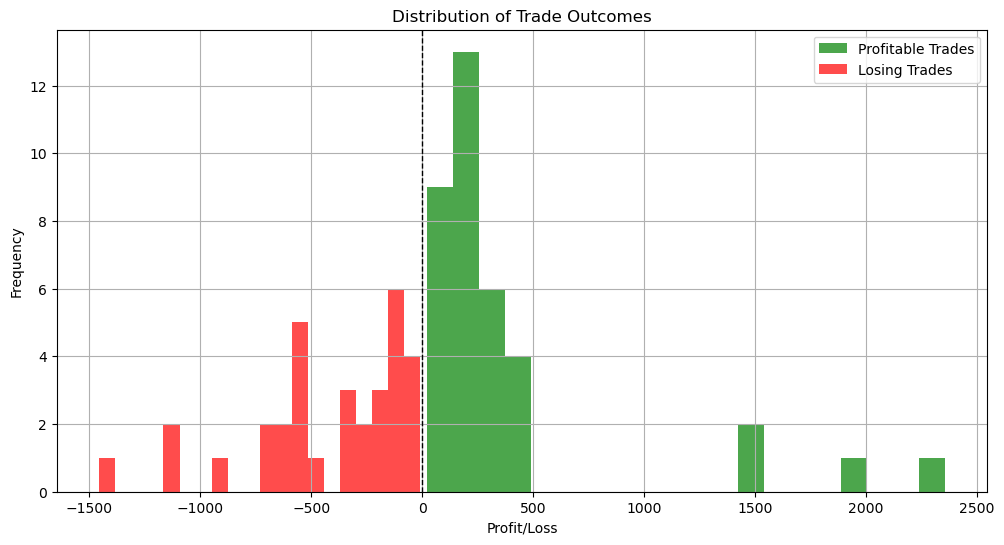


=== Performance Metrics ===
Total Profit: 99.99
Total Trades: 68
Win Rate: 52.94%
----------------------------

BUY FAILED: Not enough cash (Available: 7793.20, Needed: 7859.13)
BUY FAILED: Not enough cash (Available: 7793.20, Needed: 7823.20)
BUY FAILED: Not enough cash (Available: 271.79, Needed: 7859.13)

=== Gradient Boosting Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 104111.24
Portfolio Growth: 4.11%
Total Buys: 87, Total Sells: 87
-----------------------------------



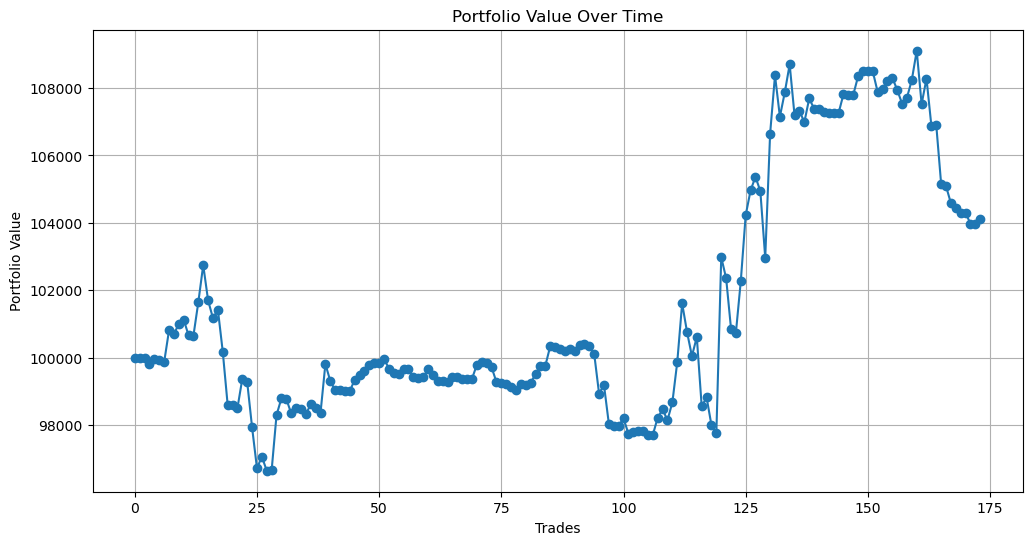

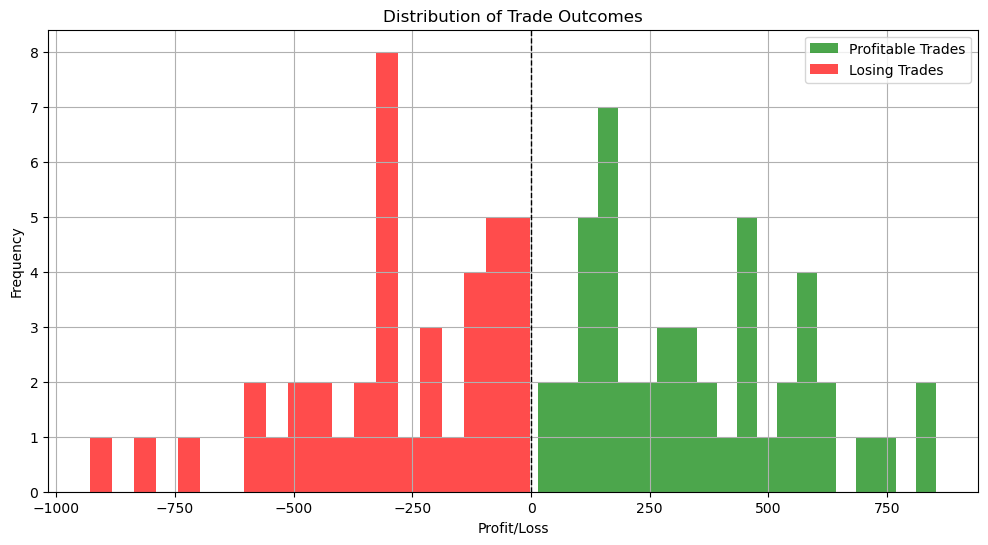


=== Performance Metrics ===
Total Profit: 4800.53
Total Trades: 87
Win Rate: 54.02%
----------------------------

Trade Log for Linear Regression:
  Action      Price  Quantity  Profit/Loss  Portfolio Value
0    BUY  73.487181       100     0.000000     99992.651282
1   SELL  74.580002       100   101.824078    100094.475360
2    BUY  73.692306       100     0.000000    100087.106129
3    BUY  73.692306       100     0.000000    100079.736898
4   SELL  77.230003       100   346.046723    100779.553344
5   SELL  77.059998       100   329.063143    100754.846764
6    BUY  69.384617       100     0.000000    100747.908303
7   SELL  75.285004       100   582.510171    101330.418474
8    BUY  72.461540       100     0.000000    101323.172320
9   SELL  77.044998       100   450.641314    101773.813634


Trade Log for Decision Tree Regressor:
  Action      Price  Quantity  Profit/Loss  Portfolio Value
0    BUY  72.615388       100     0.000000     99992.738461
1    BUY  72.307692       100  

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from TradingSimulator import TradingSimulator

# Load the CSV file into a DataFrame
df = pd.read_csv('stock_data.csv')

# Prepare the data: Features and target
X = df[['HK_Close', 'US_Close', 'VIX', 'Treasury_Yield', 'RSI_US', 'US_HK_Ratio', 'US_Volume', 'HK_Volume', 'US_MA20', 'HK_MA20']]
y = df['US_Open']

# Sequential Train-Test Split: First 80% for training, rest for testing
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Function to evaluate models and return predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")
    return y_pred

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=45),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=45),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=45)
}

# Store predictions for each model
models_predictions = {}

for model_name, model in models.items():
    y_pred = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    models_predictions[model_name] = y_pred

# Function to generate trading signals based on predicted and actual values
def generate_signals(hk_close, us_open_pred, threshold=0.001):
    # Create DataFrame with actual HK close and predicted US open values
    signals = pd.DataFrame({'HK_Close': hk_close.flatten(), 'US_Open_Pred': us_open_pred.flatten()})
    
    def determine_signal(row):
        hk_close = row['HK_Close']
        us_open_pred = row['US_Open_Pred']
        
        # Calculate percentage difference
        percent_diff = (us_open_pred - hk_close) / hk_close
        
        if percent_diff > threshold:  # If predicted US Open > HK Close + threshold
            return 1  # Buy
        elif percent_diff < -threshold:  # If predicted US Open < HK Close - threshold
            return -1  # Sell
        else:
            return 0  # Hold

    signals['signal'] = signals.apply(determine_signal, axis=1)
    return signals

# Test each model with the TradingSimulator
results = {}

for model_name, y_pred in models_predictions.items():
    # Generate signals based on HK close and predicted US open
    hk_close = X_test['HK_Close'].to_numpy()
    us_open_pred = y_pred
    signals = generate_signals(hk_close, us_open_pred)
    
    # Combine signals with test data
    df_test = df.iloc[train_size:train_size + len(y_pred)].reset_index(drop=True)
    df_test['signal'] = signals['signal']
    
    # Initialize and run the simulator
    simulator = TradingSimulator(initial_cash=100000, transaction_fee=0.001)
    simulator.run(df_test, hk_close_column='HK_Close', us_open_column='US_Open', signal_column='signal')
    
    # Get results and store them
    final_portfolio_value = simulator.get_portfolio_value(df_test['US_Open'].iloc[-1])
    trade_log = simulator.get_trade_log()
    results[model_name] = {
        "Simulator": simulator,  # Store the simulator instance for accessing methods later
        "Final Portfolio Value": final_portfolio_value,
        "Trade Log": trade_log
    }
    
    # Print summary and plot portfolio growth
    print(f"\n=== {model_name} Results ===")
    simulator.summary(df_test['US_Open'].iloc[-1])
    simulator.plot_portfolio_growth()
    simulator.plot_trade_outcomes()
    simulator.calculate_metrics()

# Optional: Display trade logs for each model
for model_name, result in results.items():
    print(f"Trade Log for {model_name}:")
    print(result["Trade Log"].head(10))  # Display the first 10 rows for brevity
    print("\n")
